# 02. Global Analysis

This notebook focuses on worldwide COVID-19 trends, using aggregated data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
data_dir = "../archive"

## 1. Load Data

In [2]:
day_wise = pd.read_csv(os.path.join(data_dir, "day_wise.csv"))
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

worldometer = pd.read_csv(os.path.join(data_dir, "worldometer_data.csv"))

## 2. Global Trends Over Time

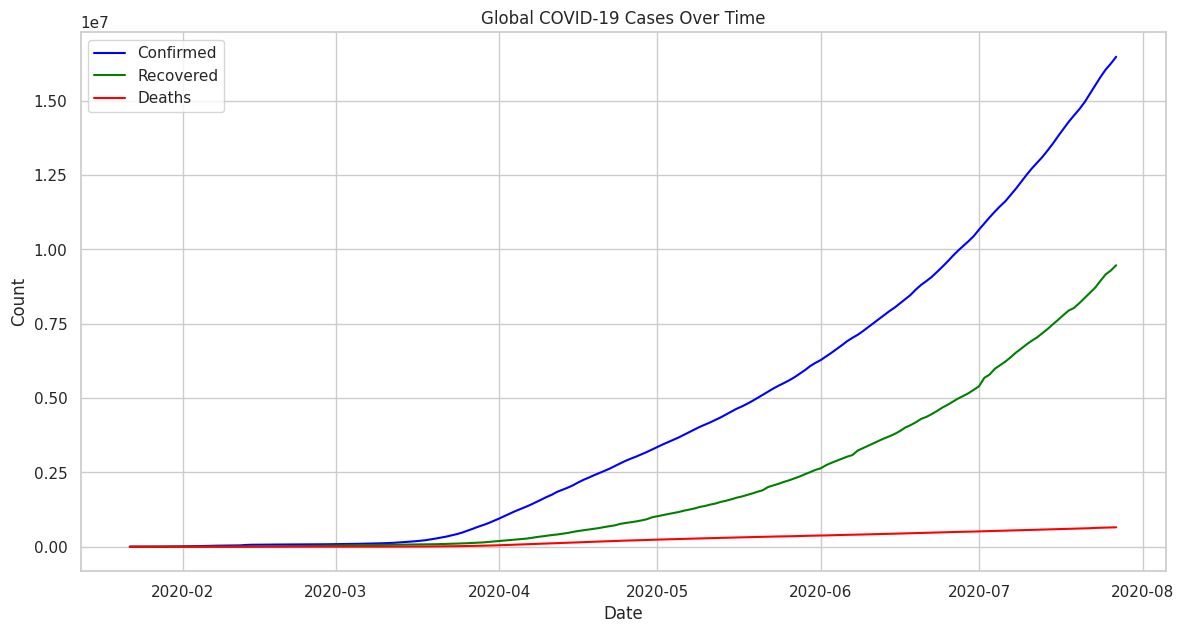

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(day_wise['Date'], day_wise['Confirmed'], label='Confirmed', color='blue')
plt.plot(day_wise['Date'], day_wise['Recovered'], label='Recovered', color='green')
plt.plot(day_wise['Date'], day_wise['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

## 3. Daily New Cases

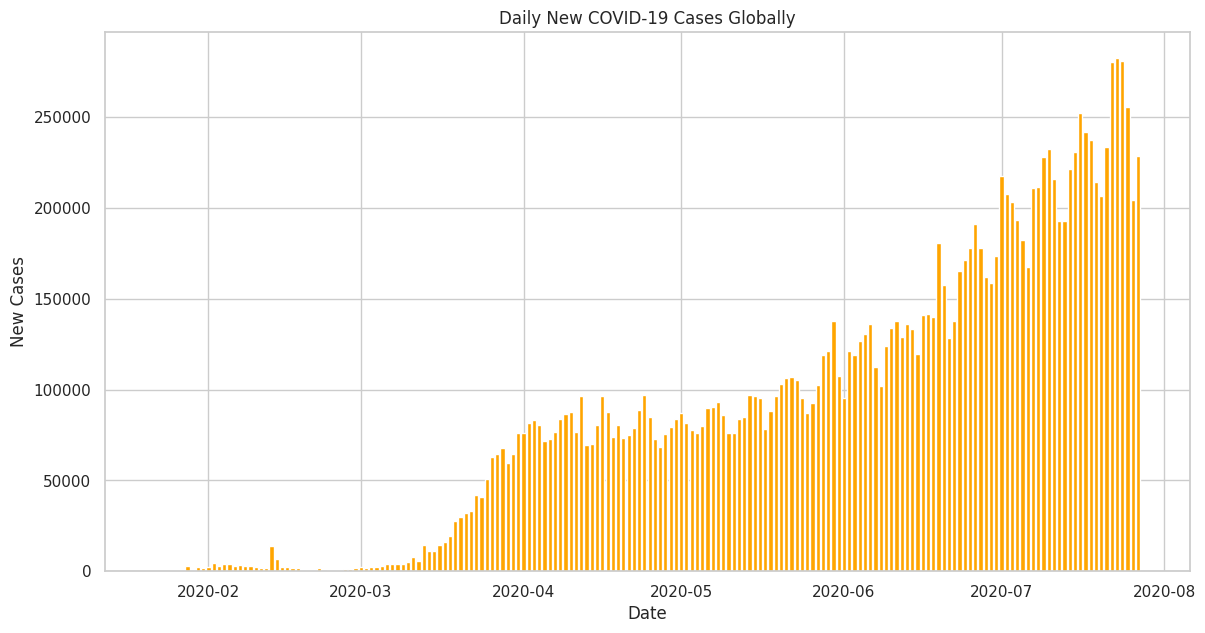

In [4]:
plt.figure(figsize=(14, 7))
plt.bar(day_wise['Date'], day_wise['New cases'], color='orange')
plt.title('Daily New COVID-19 Cases Globally')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

## 4. Correlation Heatmap
Exploring relationships between different metrics.

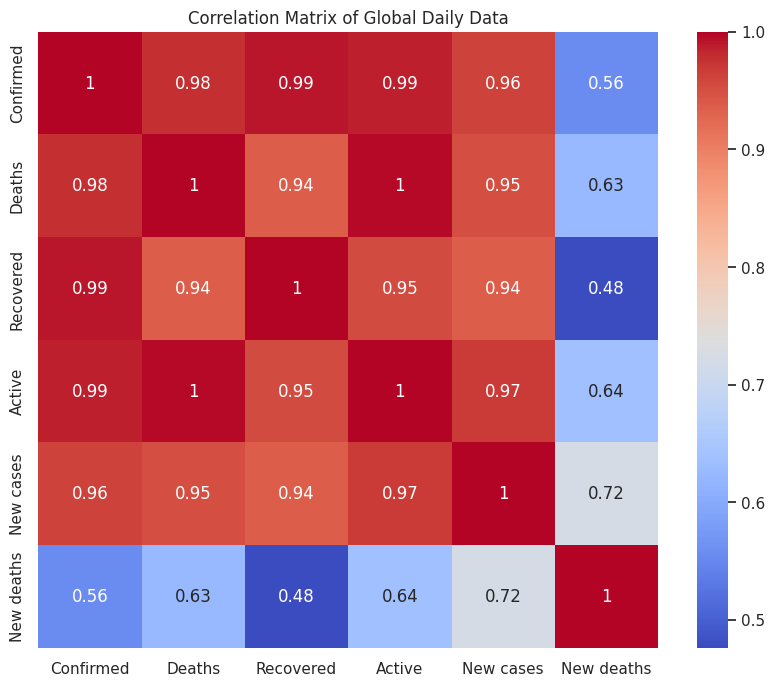

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(day_wise[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Global Daily Data')
plt.show()

## 5. Daily Success Rate (Recovery Rate)
We calculate the ratio of Recovered cases to the sum of Recovered and Death cases.

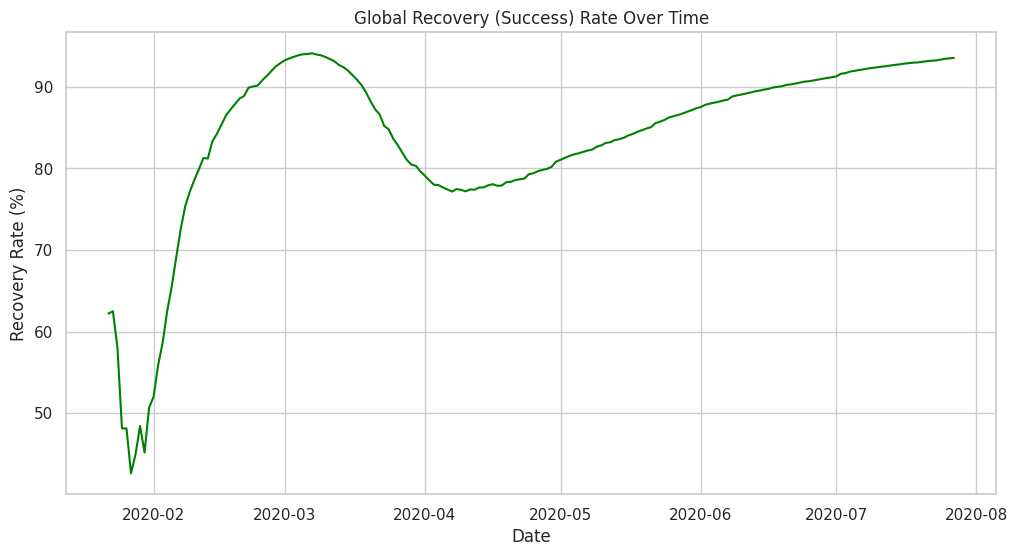

In [6]:
day_wise['Recovery Rate'] = day_wise['Recovered'] / (day_wise['Recovered'] + day_wise['Deaths']) * 100

plt.figure(figsize=(12, 6))
plt.plot(day_wise['Date'], day_wise['Recovery Rate'], color='green')
plt.title('Global Recovery (Success) Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Recovery Rate (%)')
plt.show()

## 6. 7-Day Rolling Average of New Cases
Smoothing out the daily fluctuations to see the trend clearer.

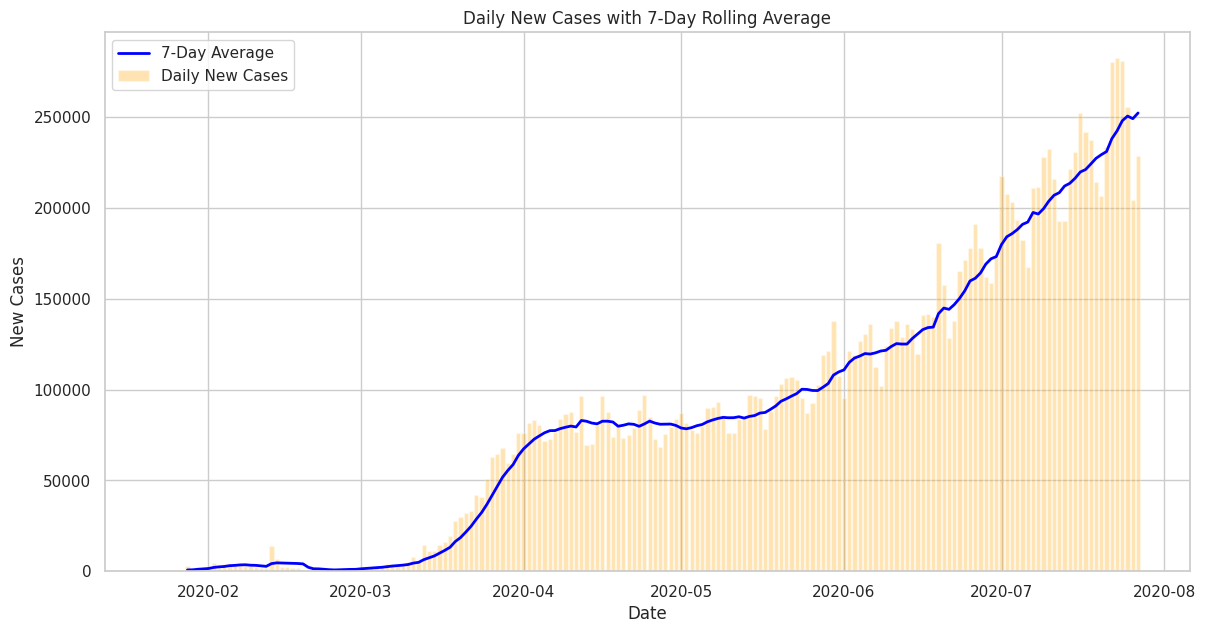

In [7]:
day_wise['New Cases 7-Day Avg'] = day_wise['New cases'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.bar(day_wise['Date'], day_wise['New cases'], color='orange', alpha=0.3, label='Daily New Cases')
plt.plot(day_wise['Date'], day_wise['New Cases 7-Day Avg'], color='blue', linewidth=2, label='7-Day Average')
plt.title('Daily New Cases with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()